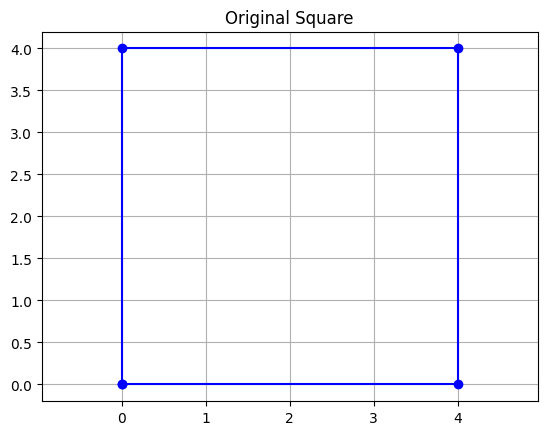

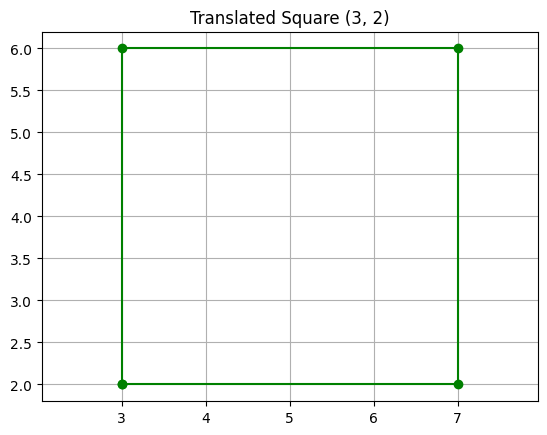

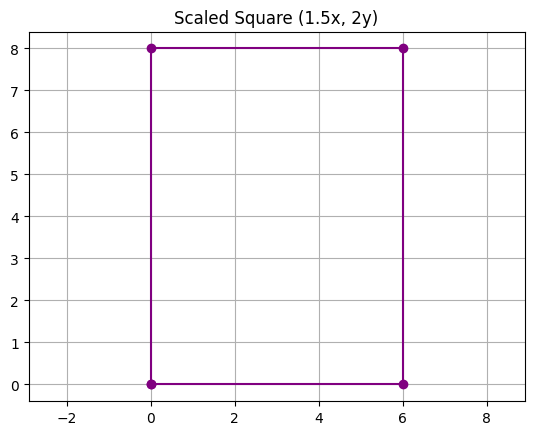

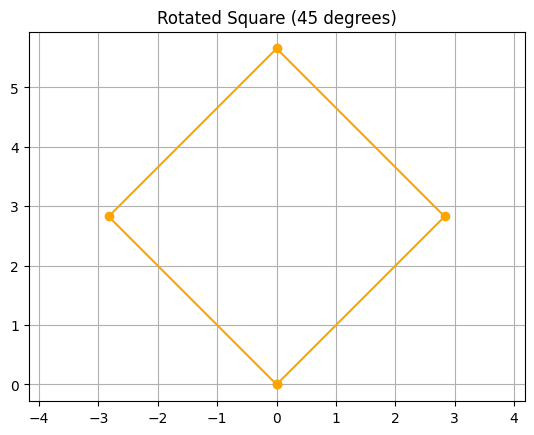

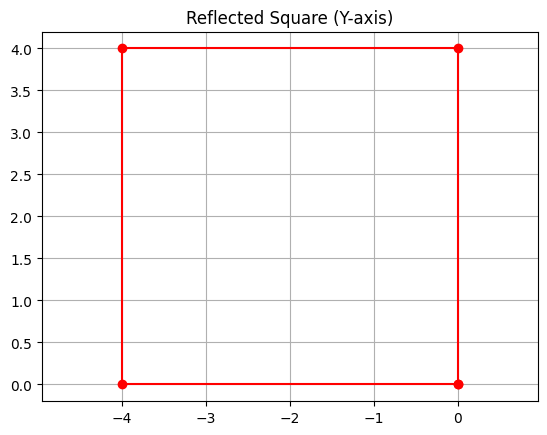

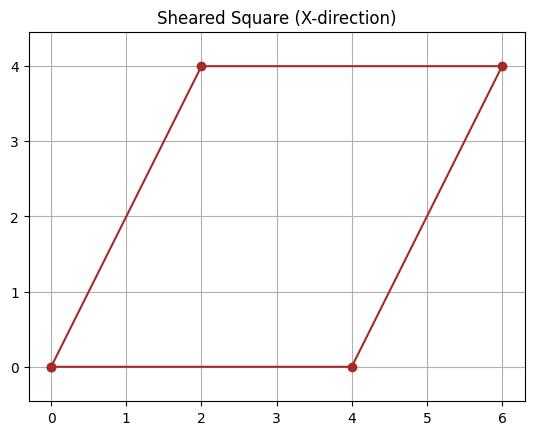

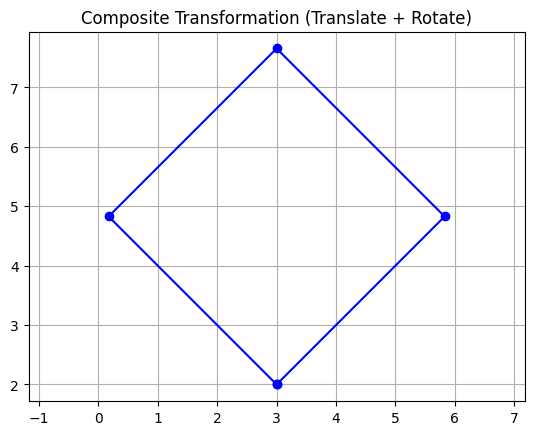

In [1]:
# Task 1: 2D Transformation Operations

import numpy as np
import matplotlib.pyplot as plt

def plot_polygon(polygon, title, color='blue'):
    plt.figure()
    plt.plot(polygon[:, 0], polygon[:, 1], marker='o', color=color)
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Define a 2D object (Square)
square = np.array([
    [0, 0],
    [4, 0],
    [4, 4],
    [0, 4],
    [0, 0]  # Closing the square
])

def translate(polygon, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    translated_polygon = homogeneous_polygon @ translation_matrix.T
    return translated_polygon[:, :2]

def scale(polygon, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    scaled_polygon = homogeneous_polygon @ scaling_matrix.T
    return scaled_polygon[:, :2]

def rotate(polygon, angle):
    radians = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                 [np.sin(radians), np.cos(radians), 0],
                                 [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    rotated_polygon = homogeneous_polygon @ rotation_matrix.T
    return rotated_polygon[:, :2]

def reflect(polygon, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    reflected_polygon = homogeneous_polygon @ reflection_matrix.T
    return reflected_polygon[:, :2]

def shear(polygon, shx, shy):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    sheared_polygon = homogeneous_polygon @ shearing_matrix.T
    return sheared_polygon[:, :2]

def composite_transform(polygon, transforms):
    composite_matrix = np.eye(3)
    for transform in transforms:
        composite_matrix = composite_matrix @ transform
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    transformed_polygon = homogeneous_polygon @ composite_matrix.T
    return transformed_polygon[:, :2]

# Display original square
plot_polygon(square, "Original Square")

# Apply transformations
translated_square = translate(square, 3, 2)
plot_polygon(translated_square, "Translated Square (3, 2)", color='green')

scaled_square = scale(square, 1.5, 2)
plot_polygon(scaled_square, "Scaled Square (1.5x, 2y)", color='purple')

rotated_square = rotate(square, 45)
plot_polygon(rotated_square, "Rotated Square (45 degrees)", color='orange')

reflected_square = reflect(square, 'y')
plot_polygon(reflected_square, "Reflected Square (Y-axis)", color='red')

sheared_square = shear(square, 0.5, 0)
plot_polygon(sheared_square, "Sheared Square (X-direction)", color='brown')

# Composite transformation: Translate, then rotate
translation_matrix = np.array([[1, 0, 3], [0, 1, 2], [0, 0, 1]])
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                             [np.sin(np.pi/4), np.cos(np.pi/4), 0],
                             [0, 0, 1]])
composite_square = composite_transform(square, [translation_matrix, rotation_matrix])
plot_polygon(composite_square, "Composite Transformation (Translate + Rotate)", color='blue')


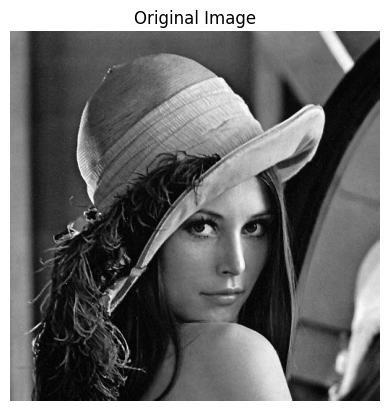

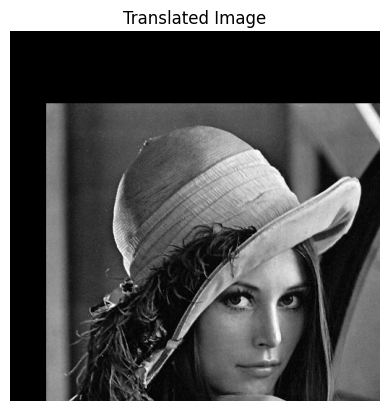

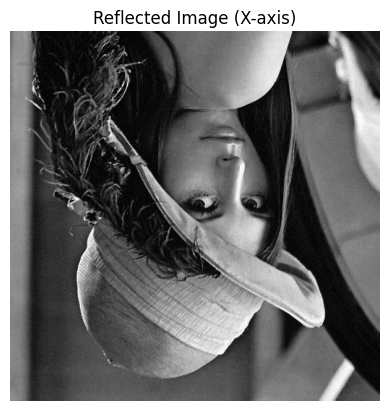

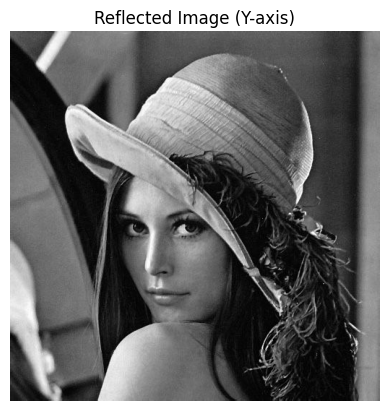

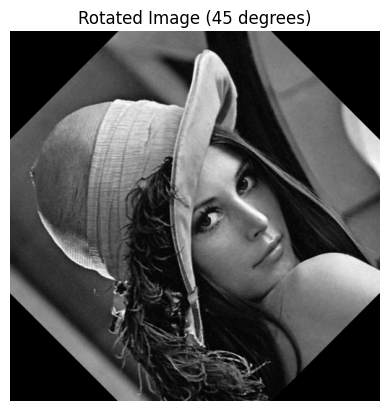

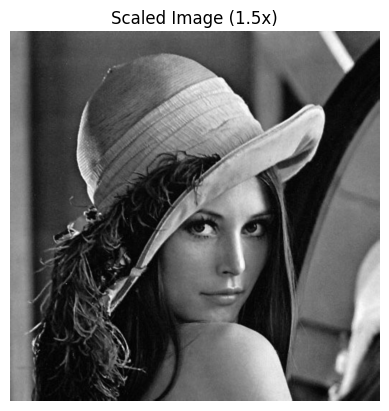

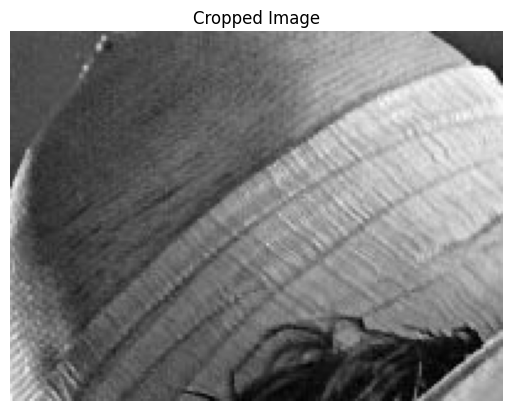

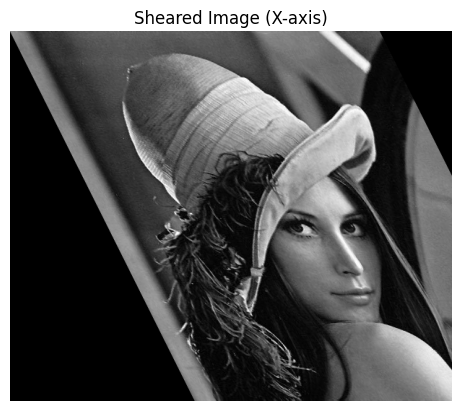

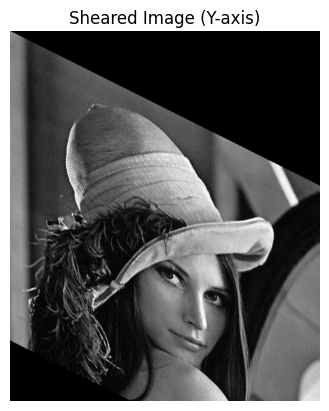

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()                                            `

# Load an example image
image_path = 'Picture1.jpg'  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found. Please provide a valid image path.")

# Display original image
display_image("Original Image", image)

# Image Translation
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 100]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
display_image("Translated Image", translated_image)

# Image Reflection
reflected_image_x = cv2.flip(image, 0)  # Reflection across the X-axis
display_image("Reflected Image (X-axis)", reflected_image_x)

reflected_image_y = cv2.flip(image, 1)  # Reflection across the Y-axis
display_image("Reflected Image (Y-axis)", reflected_image_y)

# Image Rotation
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate 45 degrees
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
display_image("Rotated Image (45 degrees)", rotated_image)

# Image Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
display_image("Scaled Image (1.5x)", scaled_image)

# Image Cropping
cropped_image = image[50:200, 100:300]  # Crop specific region
display_image("Cropped Image", cropped_image)

# Shearing in X-axis
shear_matrix_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shear_matrix_x, (cols + 100, rows))
display_image("Sheared Image (X-axis)", sheared_image_x)

# Shearing in Y-axis
shear_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shear_matrix_y, (cols, rows + 100))
display_image("Sheared Image (Y-axis)", sheared_image_y)
